In [2]:
#pip install pyopt

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for pyopt: filename=pyopt-0.84-py3-none-any.whl size=8106 sha256=dc051b6ef0247c1c0a6d3cccfa01cdb5d773628958bd6a3b27bbb7969360c404
  Stored in directory: c:\users\yv67\appdata\local\pip\cache\wheels\3f\19\4c\5ff945c26259479db8cbe5b34436d1198e5243236bf3aa8801
Successfully built pyopt
Note: you may need to restart the kernel to use updated packages.


In [21]:
#! pip install yfinance

In [ ]:
#pip install ppprint

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.optimize as sci_plt
import yfinance as yf
import pathlib
import matplotlib as mpl
import scipy.optimize as opt

In [5]:
from pprint import pprint
from sklearn.preprocessing import StandardScaler

In [6]:
## set the some display option

pd.set_option('display.max.colwidth',-1)
pd.set_option('expand_frame_repr',False)

C:\Users\yv67\AppData\Local\Temp/ipykernel_24128/4005847669.py:3: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max.colwidth',-1)


In [7]:
## Set File path for stocks

filepath = r"C:\Users\yv67\Documents\12FundsHK_ToShare\StockData\stocks - Copy (2).csv"


In [8]:
#  SET ticker, yf_period and yf_interval
#  ticker - securities to download
ticker      = [ "ONGC.NS", "NTPC.NS",  "RELIANCE.NS",  "HDFCBANK.NS", 
 "KOTAKBANK.NS",  "MARUTI.NS", "BHARTIARTL.NS",  "SBILIFE.NS",
 "ICICIBANK.NS", "NESTLEIND.NS",  "ASIANPAINT.NS",  "HINDUNILVR.NS", 
              "COALINDIA.NS", "HDFC.NS",  "ADANIPORTS.NS", "HCLTECH.NS",
             "TCS.NS",  "SBIN.NS", "SUNPHARMA.NS",  "INFY.NS", "DRREDDY.NS"]

#ticker      = [ "ONGC.NS", "NTPC.NS",  "RELIANCE.NS",  "HDFCBANK.NS"] 
#  set market indexes to compare equities with
market_index = ['^NSEI']  # Dow Jones, Nasdaq and S&P500

#  time period and interval
yf_period   = "10y"   # 1d,5d,1mo,3mo,6mo,1y,2y,5y,10y,ytd,max
yf_interval = "1d"    # 1m,2m,5m,15m,30m,60m,90m,1h,1d,5d,1wk,1mo,3mo


#  print set parameters
print('TICKER:\t\t{}'.format(ticker))
print('MARKET INDEX:\t{}'.format(market_index))
print('PERIOD:\t\t{}'.format(yf_period))
print('INTERVAL:\t{}'.format(yf_interval))

TICKER:		['ONGC.NS', 'NTPC.NS', 'RELIANCE.NS', 'HDFCBANK.NS', 'KOTAKBANK.NS', 'MARUTI.NS', 'BHARTIARTL.NS', 'SBILIFE.NS', 'ICICIBANK.NS', 'NESTLEIND.NS', 'ASIANPAINT.NS', 'HINDUNILVR.NS', 'COALINDIA.NS', 'HDFC.NS', 'ADANIPORTS.NS', 'HCLTECH.NS', 'TCS.NS', 'SBIN.NS', 'SUNPHARMA.NS', 'INFY.NS', 'DRREDDY.NS']
MARKET INDEX:	['^NSEI']
PERIOD:		10y
INTERVAL:	1d


In [9]:
#  1.  uppercase and sort ticker
ticker = [x.upper() for x in ticker]
ticker.sort()


#  2.  remove markets from ticker for plots, returns
for market in market_index:
    if market in ticker:
        ticker.remove(market)

symbols = []   # initialize list
symbols = ticker + market_index
#  print set parameters
print('\nSYMBOLS (ticker + market index):\n{}'.format(symbols))


SYMBOLS (ticker + market index):
['ADANIPORTS.NS', 'ASIANPAINT.NS', 'BHARTIARTL.NS', 'COALINDIA.NS', 'DRREDDY.NS', 'HCLTECH.NS', 'HDFC.NS', 'HDFCBANK.NS', 'HINDUNILVR.NS', 'ICICIBANK.NS', 'INFY.NS', 'KOTAKBANK.NS', 'MARUTI.NS', 'NESTLEIND.NS', 'NTPC.NS', 'ONGC.NS', 'RELIANCE.NS', 'SBILIFE.NS', 'SBIN.NS', 'SUNPHARMA.NS', 'TCS.NS', '^NSEI']


In [10]:
print ("Total number of stocks to be retrived : {} ".format(len(symbols)))
#  print set parameters
print('\nTicker :\t\t{}'.format(ticker))

print('\nMarket Index:\t{}'.format(market_index))


# If we don't have Stocks data then grab it from Nifty 50 using yahoo finance else read from CSV file

if not pathlib.Path(filepath).exists():
    
    
    
      #  1.  Create dataframe yf_price with yf.download
    stockdataset = yf.download(
            tickers = symbols,       # tickers list or string as well
            period = yf_period,      # optional, default is '1mo'
            interval = yf_interval,  # fetch data by intervaal
            group_by = 'ticker',     # group by ticker
            auto_adjust = True,      # adjust all OHLC (open-high-low-close)
            prepost = True,          # download market hours data
            threads = True,          # threads for mass downloading
            proxy = None)            # proxy

   
    # 2.  Select 'Close' (price at market close) column only
    stockdataset = stockdataset.iloc[:, stockdataset.columns.get_level_values(1)=='Close']

    
    # 3.  Remove the dataframe multi-index
    stockdataset.columns = stockdataset.columns.droplevel(1)  # multi-index

    print("\n Writing the stocks file at the path : "+ filepath)
    stockdataset.to_csv(filepath)

else:
    print("\nReading the stocks file from the path : "+ filepath)
    stockdataset = pd.read_csv(filepath,parse_dates=['Date'], index_col=['Date'])

#stockdataset.set_index('Date',inplace=True)

display(stockdataset.tail(10))  

Total number of stocks to be retrived : 22 

Ticker :		['ADANIPORTS.NS', 'ASIANPAINT.NS', 'BHARTIARTL.NS', 'COALINDIA.NS', 'DRREDDY.NS', 'HCLTECH.NS', 'HDFC.NS', 'HDFCBANK.NS', 'HINDUNILVR.NS', 'ICICIBANK.NS', 'INFY.NS', 'KOTAKBANK.NS', 'MARUTI.NS', 'NESTLEIND.NS', 'NTPC.NS', 'ONGC.NS', 'RELIANCE.NS', 'SBILIFE.NS', 'SBIN.NS', 'SUNPHARMA.NS', 'TCS.NS']

Market Index:	['^NSEI']
[*********************100%***********************]  22 of 22 completed

 Writing the stocks file at the path : C:\Users\yv67\Documents\12FundsHK_ToShare\StockData\stocks - Copy (2).csv


,ADANIPORTS.NS,BHARTIARTL.NS,HDFC.NS,DRREDDY.NS,HCLTECH.NS,ASIANPAINT.NS,COALINDIA.NS,KOTAKBANK.NS,TCS.NS,NESTLEIND.NS,...,MARUTI.NS,INFY.NS,ICICIBANK.NS,SUNPHARMA.NS,SBILIFE.NS,ONGC.NS,HINDUNILVR.NS,NTPC.NS,RELIANCE.NS,HDFCBANK.NS
Date,,,,,,,,,,,,,,,,,,,,,
2023-05-10,691.000000,796.049988,2709.150879,4867.299805,1078.300049,3041.399902,236.550003,1958.699951,3286.800049,22050.000000,...,9168.150391,1263.250000,936.049988,953.799988,1188.800049,166.949997,2522.699951,177.050003,2496.600098,1633.368652
2023-05-11,708.799988,788.599976,2723.421631,4532.000000,1088.099976,3139.750000,236.149994,1957.949951,3282.149902,22019.800781,...,9260.900391,1256.099976,939.200012,961.049988,1185.400024,167.050003,2592.399902,179.550003,2480.300049,1634.456177
2023-05-12,700.000000,791.950012,2732.427246,4466.100098,1095.500000,3131.100098,235.050003,1960.599976,3274.300049,21794.150391,...,9295.400391,1245.199951,943.900024,956.000000,1187.050049,165.500000,2623.399902,174.949997,2484.350098,1648.890747
2023-05-15,694.049988,797.049988,2740.350098,4518.549805,1099.750000,3132.000000,237.699997,1973.000000,3255.050049,21786.599609,...,9207.299805,1258.349976,945.750000,953.000000,1189.449951,165.600006,2662.250000,175.949997,2489.250000,1656.800049
2023-05-16,687.000000,787.349976,2722.649902,4515.049805,1090.699951,3138.100098,240.949997,1947.050049,3258.149902,21780.400391,...,9071.349609,1264.300049,946.349976,940.950012,1180.750000,168.000000,2675.899902,177.449997,2453.800049,1647.300049
2023-05-17,684.599976,792.250000,2706.149902,4481.500000,1074.550049,3092.449951,241.600006,1909.150024,3208.699951,21732.500000,...,9119.400391,1246.900024,939.349976,935.950012,1162.599976,167.250000,2661.750000,176.000000,2439.300049,1638.449951
2023-05-18,664.950012,799.349976,2716.000000,4423.100098,1079.900024,3109.050049,239.600006,1927.400024,3199.850098,21679.599609,...,9053.299805,1246.000000,946.500000,929.650024,1152.699951,166.350006,2627.550049,175.100006,2434.050049,1645.000000
2023-05-19,688.099976,805.750000,2710.949951,4391.950195,1095.349976,3084.449951,239.899994,1941.650024,3222.850098,21690.150391,...,9105.950195,1268.900024,954.299988,925.849976,1154.150024,164.899994,2641.449951,173.300003,2441.949951,1646.900024
2023-05-22,729.700012,801.849976,2704.750000,4457.649902,1119.849976,3084.899902,238.699997,1940.199951,3298.699951,21494.800781,...,9156.650391,1292.800049,950.349976,937.450012,1150.800049,165.600006,2638.100098,174.100006,2455.000000,1641.050049


In [11]:
display(stockdataset.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2466 entries, 2013-05-23 to 2023-05-23
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ADANIPORTS.NS  2466 non-null   float64
 1   BHARTIARTL.NS  2466 non-null   float64
 2   HDFC.NS        2466 non-null   float64
 3   DRREDDY.NS     2466 non-null   float64
 4   HCLTECH.NS     2466 non-null   float64
 5   ASIANPAINT.NS  2466 non-null   float64
 6   COALINDIA.NS   2466 non-null   float64
 7   KOTAKBANK.NS   2466 non-null   float64
 8   TCS.NS         2466 non-null   float64
 9   NESTLEIND.NS   2466 non-null   float64
 10  ^NSEI          2454 non-null   float64
 11  SBIN.NS        2466 non-null   float64
 12  MARUTI.NS      2466 non-null   float64
 13  INFY.NS        2466 non-null   float64
 14  ICICIBANK.NS   2466 non-null   float64
 15  SUNPHARMA.NS   2466 non-null   float64
 16  SBILIFE.NS     1393 non-null   float64
 17  ONGC.NS        2466 non-null   flo

None

In [12]:
## Calculate the Log Returns 

log_return = np.log (1 + stockdataset.pct_change())
display(log_return.tail(10))  

,ADANIPORTS.NS,BHARTIARTL.NS,HDFC.NS,DRREDDY.NS,HCLTECH.NS,ASIANPAINT.NS,COALINDIA.NS,KOTAKBANK.NS,TCS.NS,NESTLEIND.NS,...,MARUTI.NS,INFY.NS,ICICIBANK.NS,SUNPHARMA.NS,SBILIFE.NS,ONGC.NS,HINDUNILVR.NS,NTPC.NS,RELIANCE.NS,HDFCBANK.NS
Date,,,,,,,,,,,,,,,,,,,,,
2023-05-10,0.000724,0.003082,0.000945,-0.013459,-0.000649,0.002172,0.000846,0.002249,0.001081,0.003573,...,0.006193,-0.005880,0.001764,-0.003820,0.004764,0.010235,0.002739,0.005948,0.006853,0.004611
2023-05-11,0.025434,-0.009403,0.005254,-0.071376,0.009047,0.031825,-0.001692,-0.000383,-0.001416,-0.001371,...,0.010066,-0.005676,0.003360,0.007572,-0.002864,0.000599,0.027254,0.014022,-0.006550,0.000666
2023-05-12,-0.012493,0.004239,0.003301,-0.014648,0.006778,-0.002759,-0.004669,0.001353,-0.002395,-0.010300,...,0.003718,-0.008716,0.004992,-0.005269,0.001391,-0.009322,0.011887,-0.025954,0.001632,0.008793
2023-05-15,-0.008536,0.006419,0.002895,0.011676,0.003872,0.000287,0.011211,0.006305,-0.005896,-0.000347,...,-0.009523,0.010505,0.001958,-0.003143,0.002020,0.000604,0.014700,0.005700,0.001970,0.004785
2023-05-16,-0.010210,-0.012245,-0.006480,-0.000775,-0.008263,0.001946,0.013580,-0.013240,0.000952,-0.000285,...,-0.014876,0.004717,0.000634,-0.012725,-0.007341,0.014389,0.005114,0.008489,-0.014344,-0.005750
2023-05-17,-0.003500,0.006204,-0.006079,-0.007458,-0.014918,-0.014654,0.002694,-0.019657,-0.015294,-0.002202,...,0.005283,-0.013858,-0.007424,-0.005328,-0.015491,-0.004474,-0.005302,-0.008205,-0.005927,-0.005387
2023-05-18,-0.029123,0.008922,0.003633,-0.013117,0.004966,0.005354,-0.008313,0.009514,-0.002762,-0.002437,...,-0.007275,-0.000722,0.007583,-0.006754,-0.008552,-0.005396,-0.012932,-0.005127,-0.002155,0.003990
2023-05-19,0.034222,0.007975,-0.001861,-0.007067,0.014205,-0.007944,0.001251,0.007366,0.007162,0.000487,...,0.005799,0.018212,0.008207,-0.004096,0.001257,-0.008755,0.005276,-0.010333,0.003240,0.001154
2023-05-22,0.058699,-0.004852,-0.002290,0.014848,0.022121,0.000146,-0.005015,-0.000747,0.023262,-0.009047,...,0.005552,0.018660,-0.004148,0.012451,-0.002907,0.004236,-0.001269,0.004606,0.005330,-0.003558


In [13]:
## Initial Randam Weights 

no_of_symbols = len(symbols)

random_weights = np.array(np.random.random(no_of_symbols))
display(random_weights)


array([0.18872646, 0.64321389, 0.59956456, 0.88707018, 0.68151926,
       0.45431677, 0.25626185, 0.93008167, 0.51763439, 0.96548768,
       0.443104  , 0.04443109, 0.88904895, 0.16928715, 0.54599476,
       0.60940119, 0.9830698 , 0.03412107, 0.14477051, 0.02919063,
       0.4860741 , 0.29781749])

In [14]:
## Generate the Rebalance Weights, they must equal 1

rebalance_weights = random_weights / np.sum(random_weights)
display(rebalance_weights)
display("Total Sum of Weights is {}".format(rebalance_weights.sum()))

array([0.01747437, 0.05955581, 0.05551427, 0.0821347 , 0.06310254,
       0.04206564, 0.02372754, 0.08611718, 0.04792828, 0.08939546,
       0.04102744, 0.00411392, 0.08231792, 0.01567446, 0.05055419,
       0.05642506, 0.0910234 , 0.0031593 , 0.01340444, 0.00270279,
       0.04500608, 0.02757522])

'Total Sum of Weights is 0.9999999999999998'

In [18]:
## Compute the Expected Returns Annualized (Yearly calender days)

exp_returns = np.sum( (log_return.mean() * rebalance_weights)*252)

display(exp_returns)

0.14352897948850285

In [19]:
## Complete the Expected Volatility, Annualized

exp_vol = np.sqrt ( 
                np.dot (
                    rebalance_weights.T ,
                        np.dot (
                             log_return.cov() * 252,  rebalance_weights)
                        )
                    )


display(exp_vol)          
    

0.15672697555915124

In [20]:
## Complete the Sharpe Ratio

sharpe_ratio = (exp_returns - .01) / exp_vol
display(sharpe_ratio)

0.8519846632152158

In [21]:
## Put the weights into a Data Frame to see them better

weight_df = pd.DataFrame( data = {'random_weights' : random_weights, 'rebalance_weights' : rebalance_weights })


## Put the weights into a Data Frame to see them better

metrics_df = pd.DataFrame ( data = 
        {'Expected Portfolio Returns' : exp_returns, 'Expected Portfolio Volatility' : exp_vol , 'Portfolio Sharpe Ratio' : sharpe_ratio}
                        , index=[0])


In [22]:
print('')
print('='*80)
print('PORTFOLIO WEIGHTS:')
print('')
print(weight_df)
print('='*80)
print('')
print('='*80)
print('PORTFOLIO METRICS:')
print('')
print(metrics_df)
print('='*80)
print('')


PORTFOLIO WEIGHTS:

    random_weights  rebalance_weights
0   0.188726        0.017474         
1   0.643214        0.059556         
2   0.599565        0.055514         
3   0.887070        0.082135         
4   0.681519        0.063103         
5   0.454317        0.042066         
6   0.256262        0.023728         
7   0.930082        0.086117         
8   0.517634        0.047928         
9   0.965488        0.089395         
10  0.443104        0.041027         
11  0.044431        0.004114         
12  0.889049        0.082318         
13  0.169287        0.015674         
14  0.545995        0.050554         
15  0.609401        0.056425         
16  0.983070        0.091023         
17  0.034121        0.003159         
18  0.144771        0.013404         
19  0.029191        0.002703         
20  0.486074        0.045006         
21  0.297817        0.027575         

PORTFOLIO METRICS:

   Expected Portfolio Returns  Expected Portfolio Volatility  Portfolio Sharpe Ratio

### Portfolio Optimization: Monte Carlo

In [23]:
# Initialize the components, to run a Monte Carlo Simulation.

# We will run 5000 iterations.
num_of_portfolios = 500000

number_of_symbols = len(symbols)


# Prep an 2D array to store the weights as they are generated, 5000 iterations for each of our 4 symbols.

all_weights = np.zeros((num_of_portfolios, number_of_symbols))

# Prep an array to store the returns as they are generated, 5000 possible return values.
ret_arr = np.zeros(num_of_portfolios)

# Prep an array to store the volatilities as they are generated, 5000 possible volatility values.
vol_arr = np.zeros(num_of_portfolios)

# Prep an array to store the sharpe ratios as they are generated, 5000 possible Sharpe Ratios.
sharpe_arr = np.zeros(num_of_portfolios)


# Start the simulations.
for ind in range(5000):

    # First, calculate the weights.
    weights = np.array(np.random.random(number_of_symbols))
    weights = weights / np.sum(weights)

    # Add the weights, to the `weights_arrays`.
    all_weights[ind, :] = weights

    # Calculate the expected log returns, and add them to the `returns_array`.
    ret_arr[ind] = np.sum((log_return.mean() * weights) * 252)
   
    # Calculate the volatility, and add them to the `volatility_array`.
    vol_arr[ind] = np.sqrt(
        np.dot(weights.T, np.dot(log_return.cov() * 252, weights))
    )

    # Calculate the Sharpe Ratio and Add it to the `sharpe_ratio_array`.
    sharpe_arr[ind] = ret_arr[ind]/vol_arr[ind]

    # Let's create our "Master Data Frame", with the weights, the returns, the volatility, and the Sharpe Ratio
simulations_data = [ret_arr, vol_arr, sharpe_arr, all_weights]

# Create a DataFrame from it, then Transpose it so it looks like our original one.
simulations_df = pd.DataFrame(data=simulations_data).T

# Give the columns the Proper Names.
simulations_df.columns = [
    'Returns',
    'Volatility',
    'Sharpe Ratio',
    'Portfolio Weights'
]

# Make sure the data types are correct, we don't want our floats to be strings.
simulations_df = simulations_df.infer_objects()

# Print out the results.
print('')
print('='*80)
print('SIMULATIONS RESULT:')
print('-'*80)
print(simulations_df.head())
print('-'*80)



SIMULATIONS RESULT:
--------------------------------------------------------------------------------
    Returns  Volatility  Sharpe Ratio                                                                                                                                                                                                                                                                                                                                                                                                                                                                           Portfolio Weights
0  0.130372  0.157796    0.826210      [0.036574628521095554, 0.08838126436267864, 0.09000261316902385, 0.06320123577592038, 0.0492790608614666, 0.040163751620824174, 0.043287847940124774, 0.003020489939413859, 0.06312719137278863, 0.0026751484564689564, 0.0024454346626362976, 0.03277401288778432, 0.06656321140687012, 0.052334048434931286, 0.007895364265689512, 0.015827687548618307

In [24]:
# Return the Max Sharpe Ratio from the run.
max_sharpe_ratio = simulations_df.loc[simulations_df['Sharpe Ratio'].idxmax()]

# Return the Min Volatility from the run.
min_volatility = simulations_df.loc[simulations_df['Volatility'].idxmin()]

print('')
print('='*80)
print('MAX SHARPE RATIO:')
print('-'*80)
print(max_sharpe_ratio)
print('-'*80)

print('')
print('='*80)
print('MIN VOLATILITY:')
print('-'*80)
print(min_volatility)
print('-'*80)


MAX SHARPE RATIO:
--------------------------------------------------------------------------------
Returns              0.155114                                                                                                                                                                                                                                                                                                                                                                                                                                                                              
Volatility           0.15496                                                                                                                                                                                                                                                                                                                                                                                            

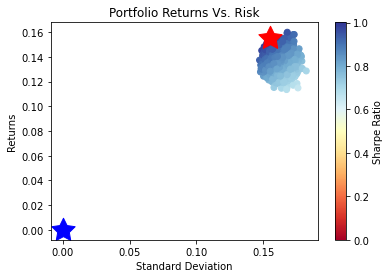

In [25]:
# This is so I can see the plot inside of my Jupyter Notebook.
%matplotlib inline

# Plot the data on a Scatter plot.
plt.scatter(
    y=simulations_df['Returns'],
    x=simulations_df['Volatility'],
    c=simulations_df['Sharpe Ratio'],
    cmap='RdYlBu'
)

# Give the Plot some labels, and titles.
plt.title('Portfolio Returns Vs. Risk')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Standard Deviation')
plt.ylabel('Returns')

# Plot the Max Sharpe Ratio, using a `Red Star`.
plt.scatter(
    max_sharpe_ratio[1],
    max_sharpe_ratio[0],
    marker=(5, 1, 0),
    color='r',
    s=600
)

# Plot the Min Volatility, using a `Blue Star`.
plt.scatter(
    min_volatility[1],
    min_volatility[0],
    marker=(5, 1, 0),
    color='b',
    s=600
)

# Finally, show the plot.
plt.show()

In [26]:
# Define the boundaries for each symbol. Remember I can only invest up to 100% of my capital into a single asset.
bounds = tuple((0, 1) for symbol in range(5))

In [28]:
# Define the constraints, here I'm saying that the sum of each weight must not exceed 100%.
constraints = ({'type': 'eq', 'fun': check_sum})

NameError: name 'check_sum' is not defined

In [29]:
# We need to create an initial guess to start with,
# and usually the best initial guess is just an
# even distribution. In this case 25% for each of the 4 stocks.
init_guess = 5 * [1 / 5]

In [30]:
from scipy.optimize import minimize

In [31]:
# defining utility functions

def calc_returns(price_data, resample=None, ret_type="arithmatic"):
    """
    Parameters
        price_data: price timeseries pd.DataFrame object.
        resample:   DateOffset, Timedelta or str. `None` for not resampling. Default: None
                    More on Dateoffsets : https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#dateoffset-objects
        ret_type:   return calculation type. \"arithmatic\" or \"log\"

    Returns:
        returns timeseries pd.DataFrame object
    """
    if ret_type=="arithmatic":
        ret = price_data.pct_change().dropna()
       
    elif ret_type=="log":
        ret = np.log(price_data/price_data.shift()).dropna()
    else:
        raise ValueError("ret_type: return calculation type is not valid. use \"arithmatic\" or \"log\"")

    if resample != None:
        if ret_type=="arithmatic":
            ret = ret.resample(resample).apply(lambda df: (df+1).cumprod(axis=0).iloc[-1]) - 1
        elif ret_type=="log":
            ret = ret.resample(resample).apply(lambda df: df.sum(axis=0))
    return(ret)
        

In [32]:
def calc_returns_stats(returns):
    """
    Parameters
        returns: returns timeseries pd.DataFrame object

    Returns:
        mean_returns: Avereage of returns
        cov_matrix: returns Covariance matrix
    """
    mean_returns = returns.mean()
    cov_matrix = returns.cov()
    return(mean_returns, cov_matrix)



In [33]:
def portfolio(weights, mean_returns, cov_matrix):

    portfolio_return = np.dot(weights.reshape(1,-1), mean_returns.values.reshape(-1,1))
    portfolio_var = np.dot(np.dot(weights.reshape(1,-1), cov_matrix.values), weights.reshape(-1,1))
    portfolio_std = np.sqrt(portfolio_var)

    return(np.squeeze(portfolio_return),np.squeeze(portfolio_var),np.squeeze(portfolio_std))

In [34]:
monthly_ret_arith = calc_returns(stockdataset, resample='BM', ret_type="arithmatic")
monthly_ret_arith.tail(10)

,ADANIPORTS.NS,BHARTIARTL.NS,HDFC.NS,DRREDDY.NS,HCLTECH.NS,ASIANPAINT.NS,COALINDIA.NS,KOTAKBANK.NS,TCS.NS,NESTLEIND.NS,...,MARUTI.NS,INFY.NS,ICICIBANK.NS,SUNPHARMA.NS,SBILIFE.NS,ONGC.NS,HINDUNILVR.NS,NTPC.NS,RELIANCE.NS,HDFCBANK.NS
Date,,,,,,,,,,,,,,,,,,,,,
2022-08-31,0.102724,0.076524,0.028850,0.037821,-0.009964,0.017353,0.126856,0.058692,-0.027484,0.029276,...,0.042001,-0.036620,0.090428,-0.050061,0.026808,0.057789,0.008512,0.092813,0.054371,0.036187
2022-09-30,-0.025530,0.100881,-0.064850,0.021354,-0.007029,-0.014492,-0.096039,-0.050249,-0.064338,-0.039198,...,-0.027978,-0.053250,-0.028513,0.062259,-0.059175,-0.085137,0.013760,-0.026524,-0.098637,-0.043570
2022-10-31,0.003534,0.040130,0.079576,0.022603,0.127870,-0.068891,0.158775,0.045487,0.065522,0.069982,...,0.079229,0.099759,0.054176,0.071944,0.012396,0.057177,-0.054053,0.084247,0.072274,0.053013
2022-11-30,0.069759,0.020132,0.090189,0.012055,0.076502,0.021704,-0.016344,0.023713,0.061898,-0.008817,...,-0.058089,0.063278,0.048641,0.028666,0.013389,0.105222,0.059459,-0.005199,0.071286,0.074664
2022-12-30,-0.071396,-0.050250,-0.020408,-0.055626,-0.072716,-0.027479,-0.009681,-0.061529,-0.039548,-0.028629,...,-0.064580,-0.077525,-0.065117,-0.042684,-0.040221,0.040043,-0.045933,-0.033391,-0.067421,0.012248
2023-01-31,-0.251131,-0.044411,-0.005554,0.020436,0.089535,-0.117248,-0.000889,-0.052675,0.052211,-0.030004,...,0.059646,0.016941,-0.066173,0.033054,-0.009543,-0.012607,0.006130,0.028237,-0.075907,-0.015140
2023-02-28,-0.032972,-0.036414,-0.005147,-0.001746,-0.039743,0.037768,-0.018576,-0.001011,-0.013651,-0.018286,...,-0.030460,-0.030122,0.027587,-0.068359,-0.080808,0.077206,-0.045057,0.022233,-0.013297,-0.002432
2023-03-31,0.066588,0.009094,0.006151,0.070924,0.007099,-0.023738,-0.008124,0.002082,-0.032283,0.055410,...,-0.038519,-0.040066,0.026203,0.027702,-0.015445,-0.006577,0.040518,0.026980,0.003660,0.006220
2023-04-28,0.078177,0.067156,0.057170,0.066432,-0.002732,0.050948,0.091037,0.118418,0.004164,0.109917,...,0.035865,-0.122693,0.046053,0.004628,0.035419,0.052301,-0.040248,-0.017704,0.038373,0.048492


In [35]:
monthly_ret_log = calc_returns(stockdataset, resample='BM', ret_type="log")
monthly_ret_log.tail(10)
     

,ADANIPORTS.NS,BHARTIARTL.NS,HDFC.NS,DRREDDY.NS,HCLTECH.NS,ASIANPAINT.NS,COALINDIA.NS,KOTAKBANK.NS,TCS.NS,NESTLEIND.NS,...,MARUTI.NS,INFY.NS,ICICIBANK.NS,SUNPHARMA.NS,SBILIFE.NS,ONGC.NS,HINDUNILVR.NS,NTPC.NS,RELIANCE.NS,HDFCBANK.NS
Date,,,,,,,,,,,,,,,,,,,,,
2022-08-31,0.097783,0.073737,0.028442,0.037123,-0.010014,0.017204,0.119432,0.057034,-0.027869,0.028855,...,0.041143,-0.037307,0.086571,-0.051358,0.026455,0.056181,0.008476,0.088755,0.052945,0.035548
2022-09-30,-0.025861,0.096111,-0.067049,0.021130,-0.007054,-0.014598,-0.100969,-0.051556,-0.066501,-0.039987,...,-0.028376,-0.054721,-0.028928,0.060397,-0.060999,-0.088981,0.013666,-0.026883,-0.103847,-0.044548
2022-10-31,0.003528,0.039346,0.076568,0.022351,0.120331,-0.071379,0.147363,0.044483,0.063465,0.067642,...,0.076247,0.095091,0.052760,0.069474,0.012319,0.055602,-0.055568,0.080886,0.069782,0.051656
2022-11-30,0.067433,0.019932,0.086352,0.011983,0.073717,0.021472,-0.016479,0.023436,0.060058,-0.008856,...,-0.059845,0.061357,0.047495,0.028262,0.013300,0.100046,0.057758,-0.005213,0.068860,0.072008
2022-12-30,-0.074073,-0.051557,-0.020619,-0.057233,-0.075495,-0.027864,-0.009728,-0.063503,-0.040352,-0.029047,...,-0.066760,-0.080695,-0.067334,-0.043622,-0.041053,0.039262,-0.047021,-0.033962,-0.069801,0.012174
2023-01-31,-0.289191,-0.045428,-0.005570,0.020230,0.085751,-0.124711,-0.000889,-0.054113,0.050894,-0.030463,...,0.057934,0.016799,-0.068464,0.032519,-0.009589,-0.012687,0.006112,0.027845,-0.078942,-0.015256
2023-02-28,-0.033527,-0.037094,-0.005160,-0.001747,-0.040555,0.037072,-0.018750,-0.001011,-0.013745,-0.018455,...,-0.030933,-0.030585,0.027214,-0.070808,-0.084261,0.074371,-0.046103,0.021989,-0.013387,-0.002435
2023-03-31,0.064465,0.009053,0.006132,0.068522,0.007074,-0.024024,-0.008158,0.002080,-0.032816,0.053929,...,-0.039280,-0.040891,0.025866,0.027326,-0.015566,-0.006599,0.039719,0.026622,0.003653,0.006201
2023-04-28,0.075272,0.064997,0.055596,0.064319,-0.002735,0.049692,0.087128,0.111915,0.004156,0.104285,...,0.035237,-0.130899,0.045024,0.004618,0.034806,0.050979,-0.041081,-0.017863,0.037655,0.047353


### Calculating the returns of an eqaully-weighted portfolio

In [36]:

equal_weights = np.array([1/len(symbols) for _ in range(len(symbols))])

mean_returns, cov_matrix = calc_returns_stats(monthly_ret_arith)

portfolio_return, portfolio_var, portfolio_std = portfolio(equal_weights, mean_returns, cov_matrix)

In [37]:
print("monthly portfolio return:\t%", round(100*portfolio_return.item(),2))
print("\nmonthly portfolio variance:\t%",round(100*portfolio_var.item(),2))
print("\nmean monthly returns of individual assets:\n",mean_returns)
print("\ncovariance matrix of assets returns:\n",cov_matrix)

monthly portfolio return:	% 1.47

monthly portfolio variance:	% 0.22

mean monthly returns of individual assets:
 ADANIPORTS.NS    0.015501
BHARTIARTL.NS    0.015749
HDFC.NS          0.010366
DRREDDY.NS       0.013046
HCLTECH.NS       0.019121
ASIANPAINT.NS    0.017908
COALINDIA.NS     0.009239
KOTAKBANK.NS     0.012533
TCS.NS           0.018670
NESTLEIND.NS     0.018920
^NSEI            0.010665
SBIN.NS          0.018968
MARUTI.NS        0.006947
INFY.NS          0.020546
ICICIBANK.NS     0.022971
SUNPHARMA.NS     0.013302
SBILIFE.NS       0.010847
ONGC.NS          0.009085
HINDUNILVR.NS    0.014954
NTPC.NS          0.010893
RELIANCE.NS      0.020725
HDFCBANK.NS      0.011760
dtype: float64

covariance matrix of assets returns:
                ADANIPORTS.NS  BHARTIARTL.NS   HDFC.NS  DRREDDY.NS  HCLTECH.NS  ASIANPAINT.NS  COALINDIA.NS  KOTAKBANK.NS    TCS.NS  NESTLEIND.NS  ...  MARUTI.NS   INFY.NS  ICICIBANK.NS  SUNPHARMA.NS  SBILIFE.NS   ONGC.NS  HINDUNILVR.NS   NTPC.NS  RELIANCE.NS  

## Monte Carlo Simulation

In [38]:
num_iter = 500000

porfolio_var_list = []
porfolio_ret_list = []
w_list =[]

max_sharpe = 0
max_sharpe_var = None
max_sharpe_ret = None
max_sharpe_w = None

daily_ret = calc_returns(stockdataset, resample=None, ret_type="log")
mean_returns, cov_matrix = calc_returns_stats(daily_ret)

for i in range(1,num_iter+1):
    rand_weights = np.random.random(len(symbols))
    rand_weights = rand_weights/np.sum(rand_weights)

    porfolio_ret, porfolio_var, portfolio_std = portfolio(rand_weights, mean_returns, cov_matrix)

    # Anuualizing
    porfolio_ret = porfolio_ret * 252
    porfolio_var = porfolio_var * 252
    portfolio_std = portfolio_std * (252**0.5)

    sharpe = (porfolio_ret/(porfolio_var**0.5)).item()
    if sharpe > max_sharpe:
        max_sharpe = sharpe
        max_sharpe_var = porfolio_var.item()
        max_sharpe_ret = porfolio_ret.item()
        max_sharpe_w = rand_weights

    porfolio_var_list.append(porfolio_var)
    porfolio_ret_list.append(porfolio_ret)
    w_list.append(rand_weights)
    #if ((i/num_iter)*100)%10 == 0:
     #   print(f'%{round((i/num_iter)*100)}...',end='')
     

In [39]:
stat = np.hstack([np.array(porfolio_ret_list).reshape(-1,1),
                 np.array(porfolio_var_list).reshape(-1,1),
                 (np.array(porfolio_ret_list)/np.sqrt(np.array(porfolio_var_list))).reshape(-1,1)]
                 )
stat=pd.DataFrame(stat, columns=['Return','Variance','Sharpe ratio'])
stat.head(3)

,Return,Variance,Sharpe ratio
0,0.124825,0.030702,0.712390
1,0.137425,0.030921,0.781513
2,0.138282,0.032033,0.772615


In [40]:

# minimum risk porfolio

min_vol = stat[stat['Variance'] == stat['Variance'].min()]

min_vol_index = min_vol.index.item()
min_vol_weights = w_list[min_vol_index]
print("Portfolio with minimum volatility:\n")
print(f"Annual Sharpe Ratio: {round(stat['Sharpe ratio'][min_vol_index],2)} | Annual Return: % {round(stat['Return'][min_vol_index]*100,2)} | Annual Volatility: % {round(stat['Variance'][min_vol_index]*100,2)}\n")
for index,symbol in enumerate(symbols):
    print(f'{symbol}:\t% {round(min_vol_weights[index]*100,2)}')

Portfolio with minimum volatility:

Annual Sharpe Ratio: 0.9 | Annual Return: % 14.02 | Annual Volatility: % 2.45

ADANIPORTS.NS:	% 1.54
ASIANPAINT.NS:	% 1.02
BHARTIARTL.NS:	% 2.19
COALINDIA.NS:	% 7.68
DRREDDY.NS:	% 2.21
HCLTECH.NS:	% 10.04
HDFC.NS:	% 7.29
HDFCBANK.NS:	% 4.35
HINDUNILVR.NS:	% 7.51
ICICIBANK.NS:	% 9.9
INFY.NS:	% 2.21
KOTAKBANK.NS:	% 1.07
MARUTI.NS:	% 0.34
NESTLEIND.NS:	% 0.84
NTPC.NS:	% 0.57
ONGC.NS:	% 4.98
RELIANCE.NS:	% 4.83
SBILIFE.NS:	% 4.35
SBIN.NS:	% 7.93
SUNPHARMA.NS:	% 11.17
TCS.NS:	% 3.44
^NSEI:	% 4.55


In [41]:
# maximum sharpe ratio porfolio

print("Portfolio with maximum sharpe ratio:\n")
print(f"Annual Sharpe Ratio: {round(max_sharpe,2)} | Annual Return: % {round(max_sharpe_ret*100,2)} | Annual Volatility: % {round(max_sharpe_var*100,2)}\n")
for index,symbol in enumerate(symbols):
    print(f'{symbol}:\t% {round(max_sharpe_w[index]*100,2)}')

Portfolio with maximum sharpe ratio:

Annual Sharpe Ratio: 1.04 | Annual Return: % 16.93 | Annual Volatility: % 2.63

ADANIPORTS.NS:	% 0.52
ASIANPAINT.NS:	% 3.28
BHARTIARTL.NS:	% 0.54
COALINDIA.NS:	% 6.64
DRREDDY.NS:	% 5.25
HCLTECH.NS:	% 9.82
HDFC.NS:	% 3.59
HDFCBANK.NS:	% 2.68
HINDUNILVR.NS:	% 10.54
ICICIBANK.NS:	% 10.55
INFY.NS:	% 5.34
KOTAKBANK.NS:	% 1.7
MARUTI.NS:	% 0.48
NESTLEIND.NS:	% 5.9
NTPC.NS:	% 7.35
ONGC.NS:	% 4.15
RELIANCE.NS:	% 1.61
SBILIFE.NS:	% 1.45
SBIN.NS:	% 7.42
SUNPHARMA.NS:	% 2.4
TCS.NS:	% 7.13
^NSEI:	% 1.68


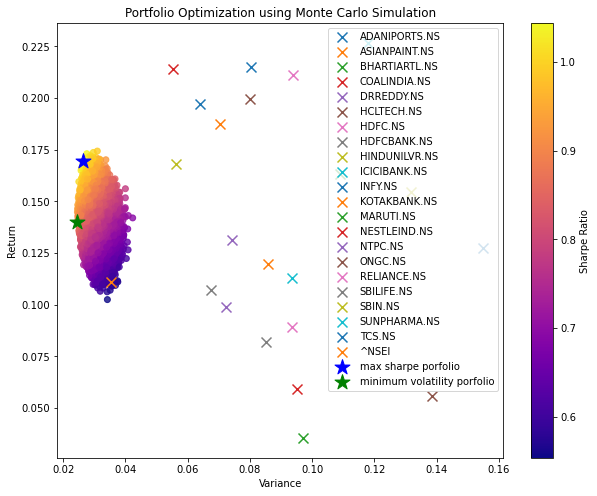

In [42]:

#plotting the portfolios

daily_ret_var = daily_ret.var()
plt.figure(figsize=(10,8))
plt.scatter(porfolio_var_list,porfolio_ret_list,c=stat['Sharpe ratio'], alpha=0.8, cmap='plasma')
for sym in symbols:
    plt.scatter(daily_ret_var.loc[sym]*252, mean_returns.loc[sym]*252, marker='x', s=100, label=sym)

plt.scatter([max_sharpe_var], [max_sharpe_ret], marker='*', s=250, label='max sharpe porfolio', c='blue')
plt.scatter(min_vol['Variance'].values, min_vol['Return'].values, marker='*', s=250, label='minimum volatility porfolio', c='green')

plt.xlabel('Variance')
plt.ylabel('Return')
plt.title('Portfolio Optimization using Monte Carlo Simulation')
plt.legend(loc='upper right')


cmap = mpl.cm.plasma
norm = mpl.colors.Normalize(vmin=stat['Sharpe ratio'].min(), vmax=stat['Sharpe ratio'].max())
plt.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap),label='Sharpe Ratio',);


## Optimization using scipy optimize module

In [43]:
def neg_sharpe_ratio(weights, mean_returns, cov_matrix, risk_free_rate=0):
    portfolio_return, portfolio_var, portfolio_std = portfolio(weights, mean_returns, cov_matrix)
    sr = ((portfolio_return - risk_free_rate)/portfolio_std) * (252**0.5) # annualized
    
    return(-sr)


In [44]:
def portfolio_variance(weights, mean_returns, cov_matrix):
    portfolio_return, portfolio_var, portfolio_std = portfolio(weights, mean_returns, cov_matrix)
    return(portfolio_var*252)

In [45]:
daily_ret = calc_returns(stockdataset, resample=None, ret_type="log")
mean_returns, cov_matrix = calc_returns_stats(daily_ret)

In [46]:

def optimize_sharpe_ratio(mean_returns, cov_matrix, risk_free_rate=0, w_bounds=(0,1)):
    "This function finds the portfolio weights which minimize the negative sharpe ratio"

    init_guess = np.array([1/len(mean_returns) for _ in range(len(mean_returns))])
    
    
    args = (mean_returns, cov_matrix, risk_free_rate)
    constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
                 
    result = opt.minimize(fun=neg_sharpe_ratio,
                          x0=init_guess,
                          args=args,
                          method='SLSQP',
                          bounds=tuple(w_bounds for _ in range(len(mean_returns))),
                          constraints=constraints,
                          )
    print(result)
    if result['success']:
        print(result['message'])
        opt_sharpe = - result['fun']
        opt_weights = result['x']
        opt_return, opt_variance, opt_std = portfolio(opt_weights, mean_returns, cov_matrix)
        return(opt_sharpe, opt_weights, opt_return.item()*252, opt_variance.item()*252, opt_std.item()*(252**0.5))
    else:
        print("Optimization operation was not succesfull!")
        print(result['message'])
        return(None)
    

In [47]:
opt_sharpe, opt_weights, opt_return, opt_variance, opt_std = optimize_sharpe_ratio(mean_returns, cov_matrix, risk_free_rate=0, w_bounds=(0,1))

     fun: -1.1856773561344078
     jac: array([ 3.63982826e-01,  2.39086151e-03,  5.41911215e-01,  4.10795212e-04,
       -7.17967749e-04,  1.22636557e-05,  2.69716024e-01,  2.72964254e-01,
       -8.09937716e-04,  2.79903412e-04,  4.12555635e-01,  2.05793649e-01,
        9.04659986e-01, -7.11813569e-04,  5.14313579e-04,  7.92563260e-02,
        3.70130524e-01,  4.70732063e-01,  2.98917294e-05,  4.48936522e-02,
       -5.58182597e-04,  2.85538077e-01])
 message: 'Optimization terminated successfully'
    nfev: 255
     nit: 11
    njev: 11
  status: 0
 success: True
       x: array([5.24695655e-17, 4.73156585e-02, 3.08068943e-16, 5.40817830e-02,
       3.06362183e-02, 8.65795078e-02, 1.08245632e-16, 0.00000000e+00,
       1.77668958e-01, 3.28727692e-01, 0.00000000e+00, 0.00000000e+00,
       2.17149413e-16, 9.73120941e-02, 8.60074709e-02, 0.00000000e+00,
       0.00000000e+00, 4.98797567e-17, 1.83888382e-02, 7.95464523e-17,
       7.32817798e-02, 1.50806170e-16])
Optimization terminate

In [48]:

# maximum sharpe ratio porfolio
print("Portfolio with maximum sharpe ratio:\n")
print(f"Annual Sharpe Ratio: {round(opt_sharpe,2)} | Annual Return: % {round(opt_return*100,2)} | Annual Volatility: % {round(opt_variance*100,2)}\n")
for index,symbol in enumerate(symbols):
    print(f'{symbol}:\t% {round(opt_weights[index]*100,2)}')
     

Portfolio with maximum sharpe ratio:

Annual Sharpe Ratio: 1.19 | Annual Return: % 20.15 | Annual Volatility: % 2.89

ADANIPORTS.NS:	% 0.0
ASIANPAINT.NS:	% 4.73
BHARTIARTL.NS:	% 0.0
COALINDIA.NS:	% 5.41
DRREDDY.NS:	% 3.06
HCLTECH.NS:	% 8.66
HDFC.NS:	% 0.0
HDFCBANK.NS:	% 0.0
HINDUNILVR.NS:	% 17.77
ICICIBANK.NS:	% 32.87
INFY.NS:	% 0.0
KOTAKBANK.NS:	% 0.0
MARUTI.NS:	% 0.0
NESTLEIND.NS:	% 9.73
NTPC.NS:	% 8.6
ONGC.NS:	% 0.0
RELIANCE.NS:	% 0.0
SBILIFE.NS:	% 0.0
SBIN.NS:	% 1.84
SUNPHARMA.NS:	% 0.0
TCS.NS:	% 7.33
^NSEI:	% 0.0


In [49]:
def minimize_portfolio_variance(mean_returns, cov_matrix, w_bounds=(0,1)):
    "This function finds the portfolio weights which minimize the portfolio volatility(variance)"

    init_guess = np.array([1/len(mean_returns) for _ in range(len(mean_returns))])
    args = (mean_returns, cov_matrix)
    constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
    result = opt.minimize(fun=portfolio_variance,
                          x0=init_guess,
                          args=args,
                          method='SLSQP',
                          bounds=tuple(w_bounds for _ in range(len(mean_returns))),
                          constraints=constraints,
                          )
    
    if result['success']:
        print(result['message'])
        min_var = result['fun']
        min_var_weights = result['x']
        min_var_return, min_var_variance, min_var_std = portfolio(min_var_weights, mean_returns, cov_matrix)
        min_var_sharpe = (min_var_return/min_var_std)*(252**0.5)
        return(min_var_sharpe, min_var_weights, min_var_return.item()*252, min_var_variance.item()*252, min_var_std.item()*(252**0.5))
    else:
        print("Optimization operation was not succesfull!")
        print(result['message'])
        return(None)
     

In [50]:
min_var_sharpe, min_var_weights, min_var_return, min_var_variance, min_var_std = minimize_portfolio_variance(mean_returns, cov_matrix, w_bounds=(0,1))

Optimization terminated successfully


In [51]:
# minimum volatility porfolio
print("Portfolio with maximum sharpe ratio:\n")
print(f"Annual Sharpe Ratio: {round(min_var_sharpe,3)} | Annual Return: % {round(min_var_return*100,2)} | Annual Volatility: % {round(min_var_variance*100,3)}\n")
for index,symbol in enumerate(symbols):
    print(f'{symbol}:\t% {round(min_var_weights[index]*100,2)}')

Portfolio with maximum sharpe ratio:

Annual Sharpe Ratio: 0.987 | Annual Return: % 14.79 | Annual Volatility: % 2.245

ADANIPORTS.NS:	% 0.0
ASIANPAINT.NS:	% 4.35
BHARTIARTL.NS:	% 0.0
COALINDIA.NS:	% 12.82
DRREDDY.NS:	% 0.19
HCLTECH.NS:	% 5.92
HDFC.NS:	% 7.63
HDFCBANK.NS:	% 0.0
HINDUNILVR.NS:	% 14.67
ICICIBANK.NS:	% 13.51
INFY.NS:	% 0.0
KOTAKBANK.NS:	% 0.0
MARUTI.NS:	% 0.0
NESTLEIND.NS:	% 1.51
NTPC.NS:	% 0.0
ONGC.NS:	% 4.07
RELIANCE.NS:	% 5.18
SBILIFE.NS:	% 0.0
SBIN.NS:	% 10.8
SUNPHARMA.NS:	% 10.3
TCS.NS:	% 0.0
^NSEI:	% 9.05


In [52]:
def calc_portfolio_return(weights, mean_returns, cov_matrix):
    portfolio_return, portfolio_var, portfolio_std = portfolio(weights, mean_returns, cov_matrix)
    return(portfolio_return.item()*252)

def efficient_portfolio(mean_returns, cov_matrix, target_return, w_bounds=(0,1)):
    """retuens the portfolio weights with minimum variance for a specific level of expected portfolio return"""    

    init_guess = np.array([1/len(mean_returns) for _ in range(len(mean_returns))])
    args = (mean_returns, cov_matrix)
    constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x)-1},
                   {'type': 'eq', 'fun': lambda x: 252*np.squeeze(np.dot(x.reshape(1,-1),mean_returns.values.reshape(-1,1))) - target_return})
    result = opt.minimize(fun=portfolio_variance,
                          x0=init_guess,
                          args=args,
                          method='SLSQP',
                          bounds=tuple(w_bounds for _ in range(len(mean_returns))),
                          constraints=constraints,
                          )
    if not result['success']:
        print(result['message'])
    efficient_variance = result['fun']
    efficient_weights = result['x']
    efficient_return, _ , efficient_std = portfolio(efficient_weights, mean_returns, cov_matrix)
    efficient_sahrpe = (efficient_return/efficient_return)*(252**0.5)
    return(efficient_sahrpe, efficient_weights, efficient_return.item()*252, efficient_variance, efficient_std.item()*(252**0.5))

In [53]:
expected_return = 0.3
efficient_sharpe, efficient_weights, efficient_return, efficient_variance, efficient_std = efficient_portfolio(mean_returns,
                                                                                                                cov_matrix,
                                                                                                                target_return=expected_return,
                                                                                                                w_bounds=(0,1))

Positive directional derivative for linesearch


In [54]:
# efficient porfolio
print("Efficient portfolio for 30% return level:\n")
print(f"Annual Sharpe Ratio: {round(efficient_sharpe ,3)} | Annual Return: % {round(efficient_return*100,2)} | Annual Volatility: % {round(efficient_variance*100,3)}\n")
for index,symbol in enumerate(symbols):
    print(f'{symbol}:\t% {round(efficient_weights[index]*100,2)}')
     

Efficient portfolio for 30% return level:

Annual Sharpe Ratio: 15.875 | Annual Return: % 22.68 | Annual Volatility: % 11.785

ADANIPORTS.NS:	% 0.0
ASIANPAINT.NS:	% 0.0
BHARTIARTL.NS:	% 0.0
COALINDIA.NS:	% 0.0
DRREDDY.NS:	% 0.0
HCLTECH.NS:	% 0.0
HDFC.NS:	% 0.0
HDFCBANK.NS:	% 0.0
HINDUNILVR.NS:	% 0.0
ICICIBANK.NS:	% 0.0
INFY.NS:	% 0.0
KOTAKBANK.NS:	% 0.0
MARUTI.NS:	% 0.0
NESTLEIND.NS:	% 0.0
NTPC.NS:	% 100.0
ONGC.NS:	% 0.0
RELIANCE.NS:	% 0.0
SBILIFE.NS:	% 0.0
SBIN.NS:	% 0.0
SUNPHARMA.NS:	% 0.0
TCS.NS:	% 0.0
^NSEI:	% 0.0


## Efficient Frontier

Positive directional derivative for linesearch
Positive directional derivative for linesearch
Positive directional derivative for linesearch
Positive directional derivative for linesearch
Positive directional derivative for linesearch
Positive directional derivative for linesearch
Positive directional derivative for linesearch
Positive directional derivative for linesearch
Positive directional derivative for linesearch
Positive directional derivative for linesearch
Positive directional derivative for linesearch
Positive directional derivative for linesearch
Positive directional derivative for linesearch
Positive directional derivative for linesearch
Positive directional derivative for linesearch
Iteration limit reached
Positive directional derivative for linesearch
Positive directional derivative for linesearch
Positive directional derivative for linesearch
Positive directional derivative for linesearch
Positive directional derivative for linesearch
Positive directional derivative for 

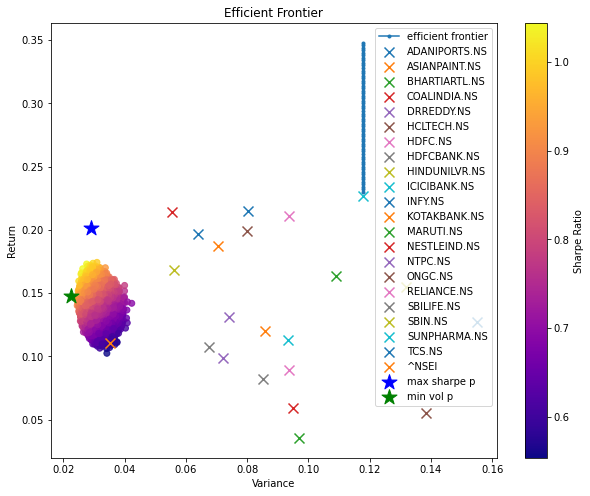

In [55]:
#plotting the Efficient Frontier

daily_ret_var = daily_ret.var()
plt.figure(figsize=(10,8))

target_rets = np.arange(0.23,0.35,0.002)
efficient_vars = np.array([efficient_portfolio(mean_returns,cov_matrix,target_return=x ,w_bounds=(0,1))[3] for x in target_rets])
plt.plot(efficient_vars,target_rets,marker='.',label="efficient frontier")

plt.scatter(porfolio_var_list,porfolio_ret_list,c=stat['Sharpe ratio'], alpha=0.8, cmap='plasma')
for sym in symbols:
    plt.scatter(daily_ret_var.loc[sym]*252, mean_returns.loc[sym]*252, marker='x', s=100, label=sym)

plt.scatter([opt_variance], [opt_return], marker='*', s=250, label='max sharpe p', c='blue')
plt.scatter(min_var_variance, min_var_return, marker='*', s=250, label='min vol p', c='green')

plt.xlabel('Variance')
plt.ylabel('Return')
plt.title('Efficient Frontier')
plt.legend(loc='upper right')

cmap = mpl.cm.plasma
norm = mpl.colors.Normalize(vmin=stat['Sharpe ratio'].min(), vmax=stat['Sharpe ratio'].max())
plt.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap),label='Sharpe Ratio',);
     
